# Credit Card Fraud Detection by Tushar Srivastava 

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]


### Loading the dataset

In [2]:
data = pd.read_csv('CC.csv',sep=',')
data=data.drop('Unnamed: 0',axis=1)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Understanding the Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.isnull().values.any()

False

In [5]:
data.dtypes.value_counts()

float64    30
int64       1
dtype: int64

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
#imbalance in the data
fraud = data[data['Class'] == 1] 
valid = data[data['Class'] == 0] 
outlierFraction = len(fraud)/float(len(valid)) 
print(outlierFraction) 
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1]))) 
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0]))) 

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [8]:
fraud.Amount.describe() 

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

## EDA : Exploratory Data Analysis

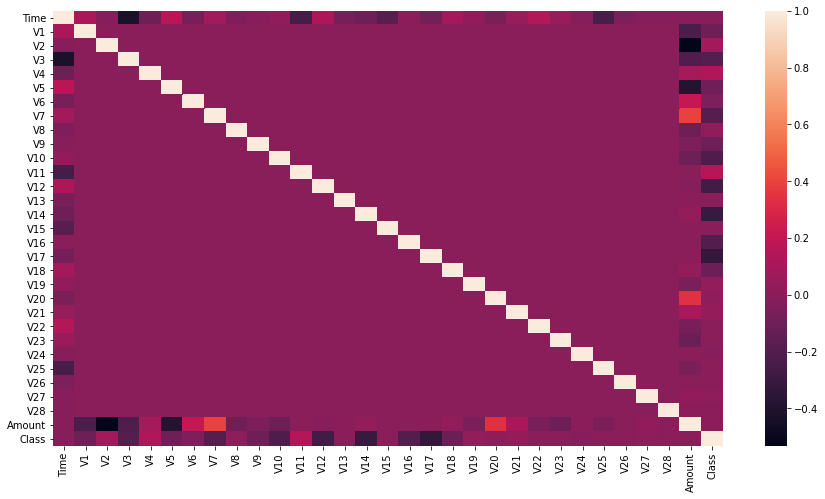

In [9]:
f, ax = plt.subplots(figsize=(15, 8))
corr = data.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Text(0, 0.5, 'Frequency')

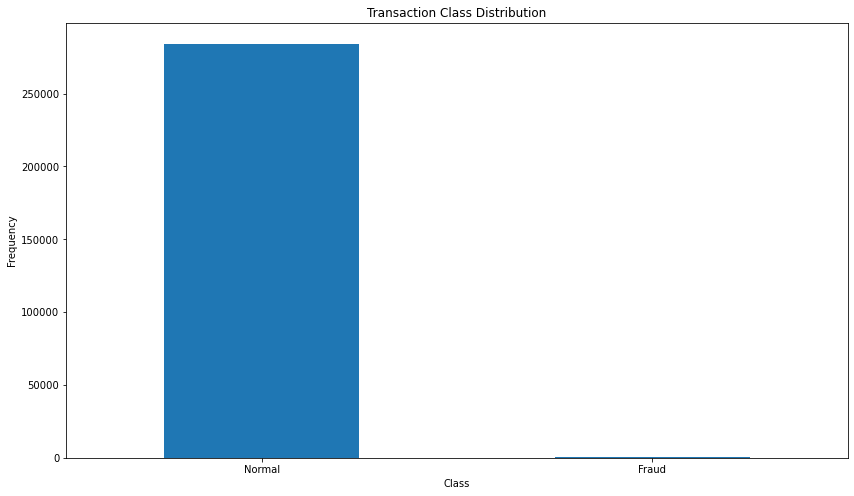

In [10]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


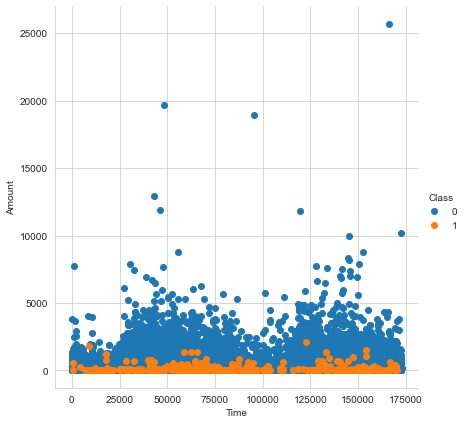

In [11]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="Class", size = 6).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


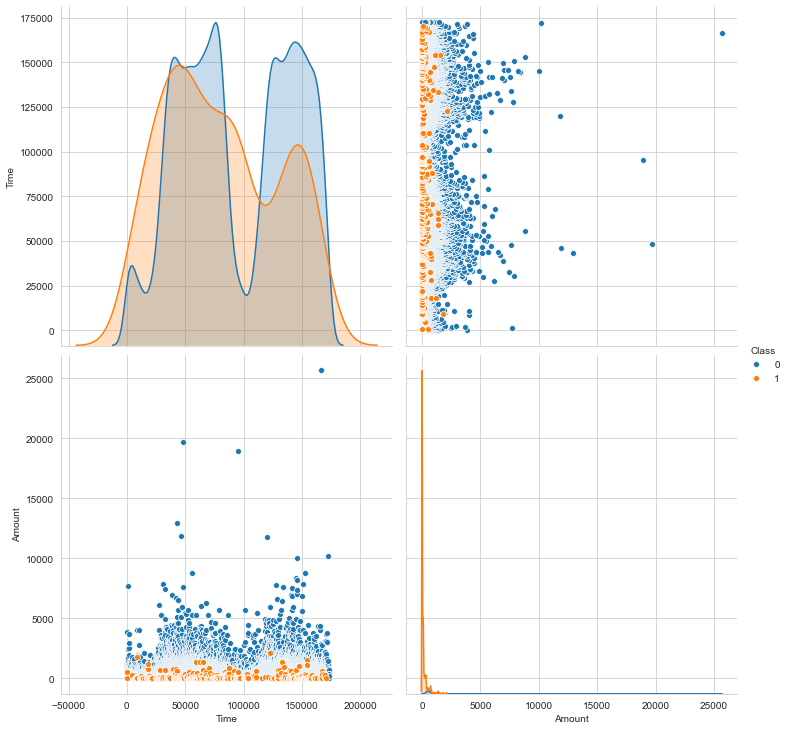

In [12]:
FilteredData = data[['Time','Amount', 'Class']]

plt.close();
sns.set_style("whitegrid");
sns.pairplot(FilteredData, hue="Class", size=5);
plt.show()

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


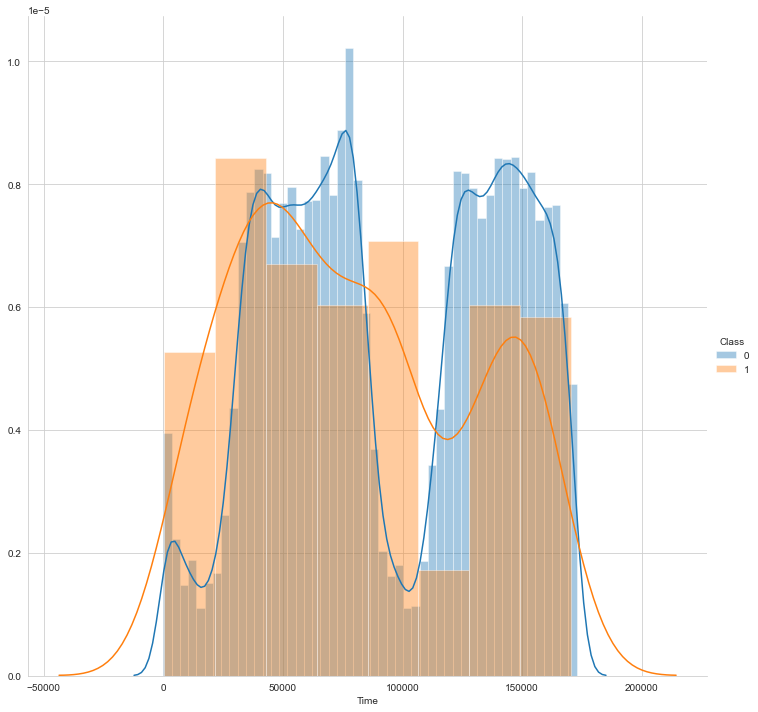

In [13]:
sns.FacetGrid(data, hue="Class", size=10).map(sns.distplot, "Time").add_legend()
plt.show()

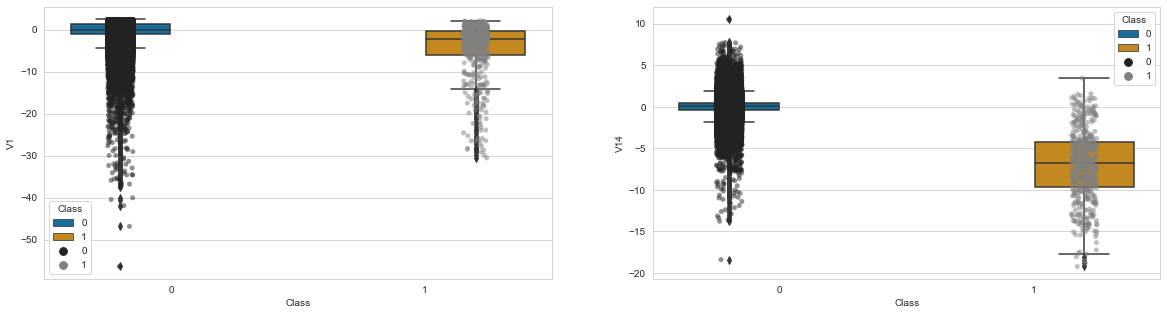

In [14]:
cols = ['V1', 'V14']
f, axes = plt.subplots(1, 2, figsize=(20, 5), sharex=True)
for index,col in enumerate(cols):
    sns.boxplot(x="Class", y=col, hue="Class", palette="colorblind", data=data, ax=axes[index]) 
    sns.stripplot(x='Class', y=col,  data=data,dodge=True,jitter=True,marker='o',ax=axes[index],alpha=0.5,color='grey',hue='Class')
plt.show()
plt.clf()
plt.close()

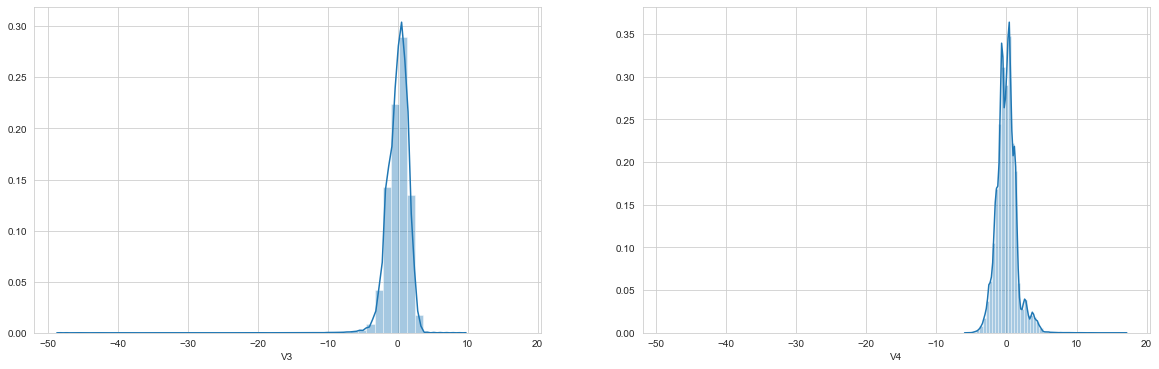

In [15]:
f, axes = plt.subplots(1, 2, figsize=(20, 6), sharex=True)
sns.distplot(data['V3'],ax=axes[0])
sns.distplot(data['V4'],ax=axes[1])

plt.show()
plt.clf()
plt.close()

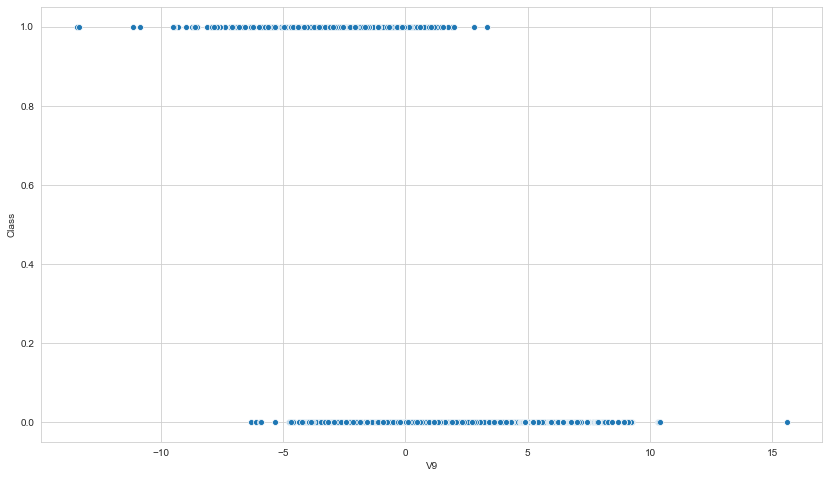

In [16]:
sns.scatterplot(x="V9", y="Class",data=data)

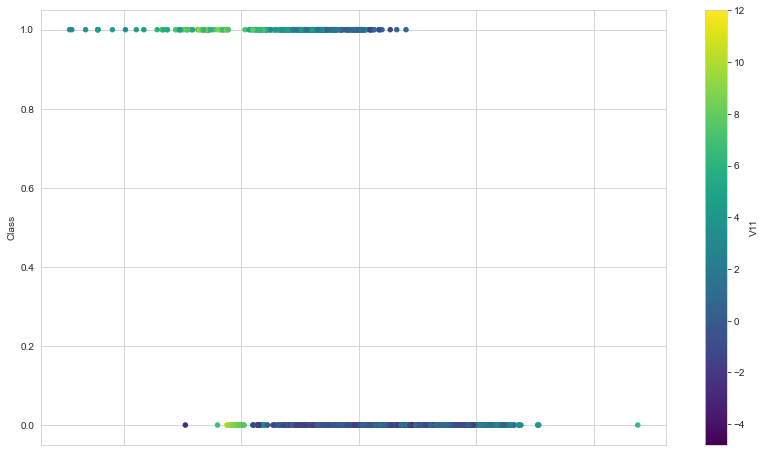

In [17]:
data.plot.scatter(x='V10',y='Class',c='V11',colormap='viridis')

## Creating the Model

RANDOM FOREST

In [18]:
#separating the X and the Y values
X = data.drop(['Class'], axis = 1) 
Y = data["Class"] 
print(X.shape) 
print(Y.shape) 

xData = X.values 
yData = Y.values

(284807, 30)
(284807,)


In [19]:
#training and testing data bifurcation
from sklearn.model_selection import train_test_split 
#split the data into training and testing sets 
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.2, random_state = 42) 

In [20]:
#building the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier 
#random forest model creation 
rfc = RandomForestClassifier() 
rfc.fit(xTrain, yTrain) 
#predictions 
yPred = rfc.predict(xTest) 

In [21]:
#building all kinds of evaluating parameters
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
  
n_outliers = len(fraud) 
n_errors = (yPred != yTest).sum() 
print("The model used is Random Forest classifier") 
  
acc = accuracy_score(yTest, yPred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(yTest, yPred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(yTest, yPred) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(yTest, yPred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(yTest, yPred) 
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random Forest classifier
The accuracy is 0.9995611109160493
The precision is 0.9620253164556962
The recall is 0.7755102040816326
The F1-Score is 0.8587570621468926
The Matthews correlation coefficient is0.8635448920046104


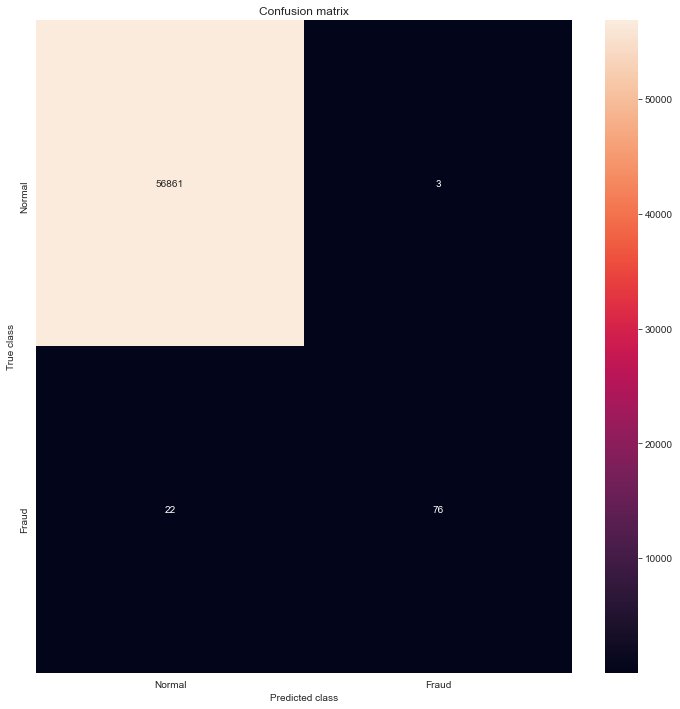

In [22]:
#visulalizing the confusion matrix
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(yTest, yPred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 


LOGISTIC REGRESSION

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [27]:
#Builiding Logistic Regression Model
model = LogisticRegression()
model.fit(xTrain, yTrain)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
pred = model.predict(xTest)

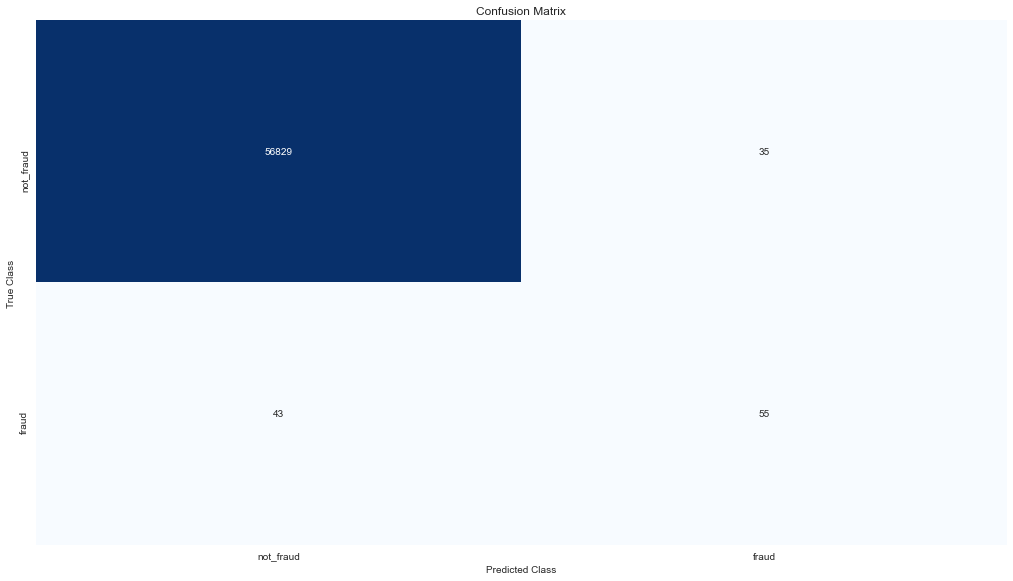

In [31]:
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(yTest, pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [32]:
from sklearn.metrics import f1_score, recall_score
f1_score = round(f1_score(yTest, pred), 2)
recall_score = round(recall_score(yTest, pred), 2)
print("Sensitivity/Recall for Logistic Regression Model 1 : {recall_score}".format(recall_score = recall_score))
print("F1 Score for Logistic Regression Model 1 : {f1_score}".format(f1_score = f1_score))

Sensitivity/Recall for Logistic Regression Model 1 : 0.56
F1 Score for Logistic Regression Model 1 : 0.59


<br>

In the above project we tried to detect Credit Card Fraud Detection using 2 different ways LOGISTIC REGRESSION and RANDOM FOREST. Through different evaluation matrices, we saw that Random forest was a better model than Logistic Regression as it was able to give 99% accuaracy.